<a href="https://colab.research.google.com/github/rusetskiy1974/Data-Sciens/blob/main/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [219]:
import requests
from pathlib import Path
from zipfile import ZipFile
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import scale
from sklearn.preprocessing import scale


In [220]:


# Константи
SAVED_DATAFRAME_BASE = Path("/content/")
URL = "https://drive.usercontent.google.com/download?id=1Zvz20Iqeia1eEtFbGa3NcIrt_SNSimP6&export=download&authuser=0"
OUTPUT = Path("/content/data.zip")
CSV_DATA_PATH  = Path("/content/data")

# Завантаження файлу з URL з перевіркою
response = requests.get(URL)
if response.status_code == 200:
    with open(OUTPUT, "wb") as file:
        file.write(response.content)
        print(f"Файл завантажено за адресою: {OUTPUT}")
else:
    print(f"Помилка завантаження файлу. Статус код: {response.status_code}")

# Перевірка чи файл дійсно є ZIP-файлом
try:
    with ZipFile(OUTPUT, 'r') as zip_ref:
        zip_ref.extractall(SAVED_DATAFRAME_BASE)
        print(f"Файл розпаковано до: {SAVED_DATAFRAME_BASE}")
except zipfile.BadZipFile:
    print("Помилка: завантажений файл не є ZIP-файлом.")

# Перевірка вмісту папки CSV_DATA_PATH
for path in CSV_DATA_PATH.iterdir():
    print(path)

Файл завантажено за адресою: /content/data.zip
Файл розпаковано до: /content
/content/data/mnist.csv
/content/data/data_2d.csv


# Завантажимо датасет data_2d присвоївши стовпцям назви "X", "Y", "Z"

In [221]:
df_2d = pd.read_csv(CSV_DATA_PATH.joinpath("data_2d.csv"), header=None ,names=["X","Y","Z"])
df_2d.info()
print(df_2d.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       200 non-null    float64
 1   Y       200 non-null    float64
 2   Z       200 non-null    float64
dtypes: float64(3)
memory usage: 4.8 KB
       X         Y         Z
105  1.0  3.282595  4.795029
131  1.0  2.979271  4.057865
115  1.0  0.808268  3.352431
195  1.0  0.629144  4.378584
71   0.0  1.736607  2.813972
172  1.0  3.694086  3.943389
177  1.0  3.062071  4.635214
94   0.0  0.572786  0.499110
148  1.0  3.001966  3.853819
134  1.0  2.896093  3.782142


In [222]:
# Масштабування даних
X_2d = scale(df_2d, axis=0, with_mean=True, with_std=True)

# Визначення оптимальної кількості кластерів за допомогою Elbow Method

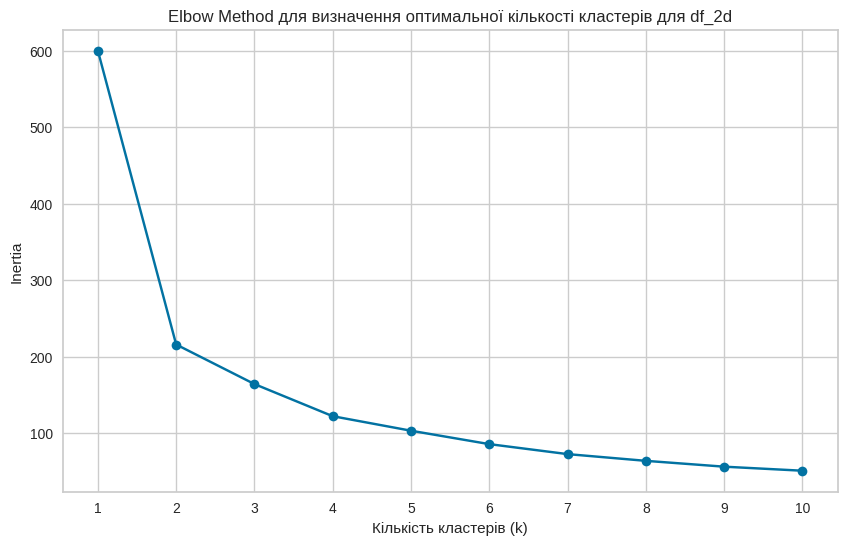

In [223]:
# Метод Elbow для визначення оптимальної кількості кластерів
inertia = []
k_values = range(1, 11)  # Кількість кластерів від 1 до 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_2d)
    inertia.append(kmeans.inertia_)

# Візуалізація методу Elbow
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, 'bo-')
plt.xlabel('Кількість кластерів (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method для визначення оптимальної кількості кластерів для df_2d')
plt.xticks(k_values)
plt.grid(True)
plt.show()

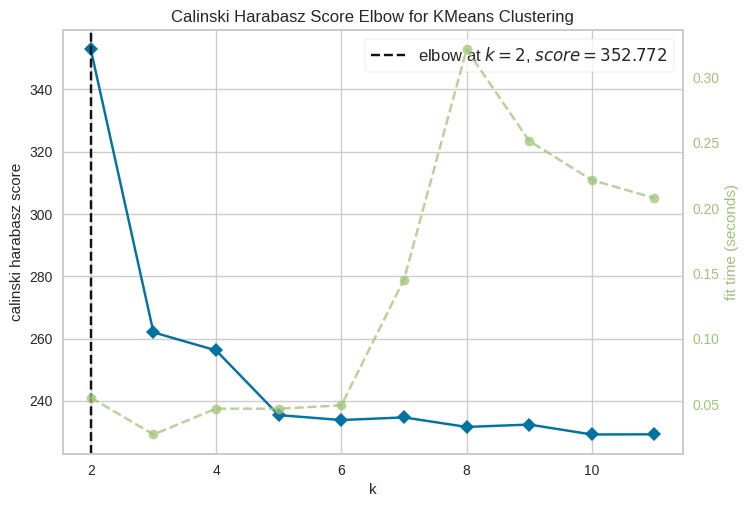

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [225]:
# Метод yellowbrick для визначення оптимальної кількості кластерів
model = KMeans(n_init=10, random_state=42)
visualizer = KElbowVisualizer(model, k=(2, 12), metric='calinski_harabasz')
visualizer.fit(X_2d)
visualizer.show()

In [226]:
# Кластеризація з оптимальною кількістю кластерів
optimal_k_2d = visualizer.elbow_value_
print(f'Оптимальна кількість кластерів: {optimal_k_2d}')
kmeans_2d = KMeans(n_clusters=optimal_k_2d, n_init=10, random_state=42)
y_kmeans_2d = kmeans_2d.fit_predict(X_2d)

Оптимальна кількість кластерів: 2


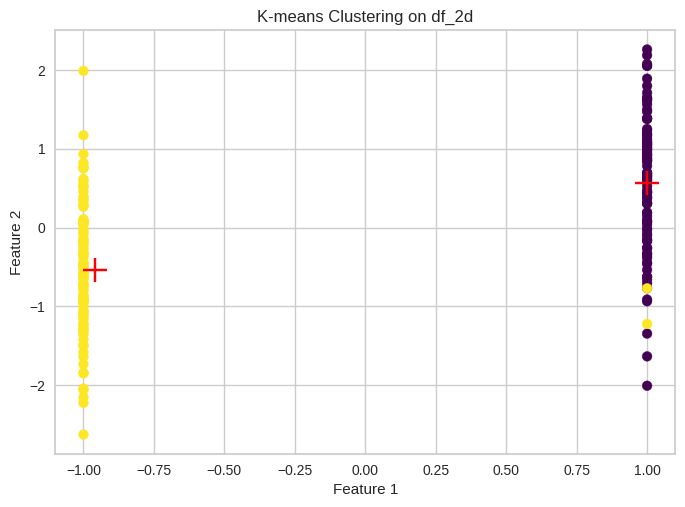

In [227]:
# Візуалізація кластерів
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_kmeans_2d, cmap='viridis')
plt.scatter(kmeans_2d.cluster_centers_[:, 0], kmeans_2d.cluster_centers_[:, 1], s=300, c='red', marker='+')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering on df_2d')
plt.show()

In [228]:

kmeans_2d.labels_, kmeans_2d.cluster_centers_

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0], dtype=int32),
 array([[ 1.        ,  0.56518053,  0.82493211],
        [-0.96078431, -0.54301659, -0.79258183]]))

In [229]:
unique, counts = np.unique(kmeans_2d.labels_, return_counts=True)
for u,c in zip(unique, counts):
  print(u,c)

0 98
1 102


Проведемо кластерізацію Standard Kmeans методом

In [232]:
df = pd.DataFrame(X_2d)


Задамо центроїди для кластерів випадковим чином

,0,1,2
153,1.0,0.652725,0.118427
168,1.0,-0.076748,-0.202113


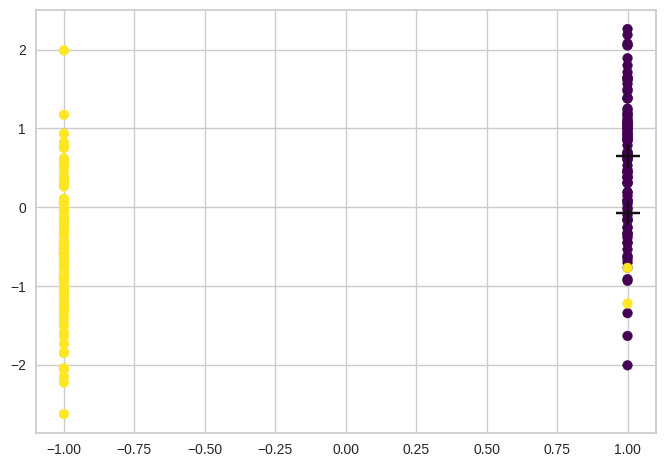

In [233]:
def random_centroids(k, df):
    return df.sample(k)

centroids = random_centroids(optimal_k_2d, df)
display(centroids)


plt.scatter(X_2d[:,0], X_2d[:, 1],c=y_kmeans_2d, cmap='viridis')
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1], marker="+", c='k', s=300)
plt.show()

Застосуємо ручний метод для кластеризації K-MEANS

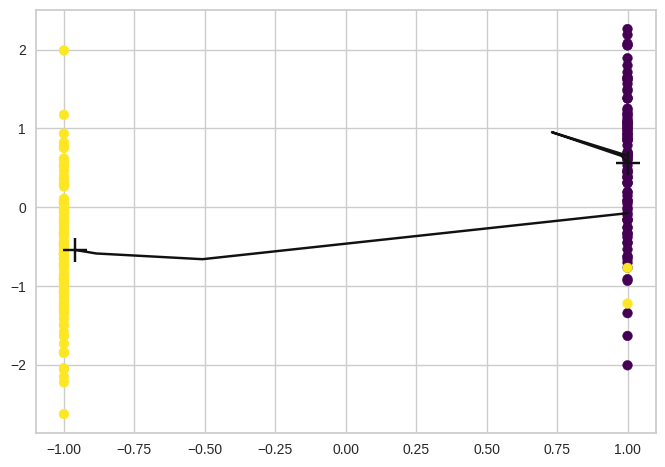

In [234]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

centroids_history = {}

def find_min_distance(row, centroids):

  centroids.reset_index(drop=True, inplace=True)
  for i, c in centroids.iterrows():
    c_df = centroids_history.get(i, pd.DataFrame({0: [], 1: []}) )
    c_df = pd.concat([c_df, pd.DataFrame([c])], axis=0)
    centroids_history[i] = c_df

  errors = np.array([np.square(np.sum((row-c)**2)) for i, c in centroids.iterrows()])
  return errors.argmin(), errors.min()

def kmeans(df, k, centroids, tol=1e-4):
    err = []
    i = 0

    # centroids = random_centroids(k, df)

    while True:
        df['centroids'], temp_err = list(zip(*[find_min_distance(row, centroids) for i, row in df.iterrows()]))
        err.append(sum(temp_err))
        centroids = df.groupby('centroids').agg('mean').reset_index(drop = True)
        if i > 0:
          if err[i-1]-err[i] < tol:
            break
        i += 1

    return df['centroids'], centroids

predicted_clusters, final_centroids = kmeans(df, optimal_k_2d, centroids)

plt.scatter(X_2d[:, 0], X_2d[:, 1], c=predicted_clusters, cmap='viridis')
plt.scatter(final_centroids.iloc[:,0], final_centroids.iloc[:,1], marker="+", c='k', s=300)

for k, v in centroids_history.items():
  plt.plot(v[0], v[1], c='k')

In [235]:
predicted_clusters.values, final_centroids.values

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0]),
 array([[ 1.        ,  0.56518053,  0.82493211],
        [-0.96078431, -0.54301659, -0.79258183]]))

In [ ]:
unique, counts = np.unique(predicted_clusters, return_counts=True)
for u,c in zip(unique, counts):
  print(u,c)

0 102
1 98


# Завантаження та підготовка даних MNIST

In [237]:

df_mnist_raw = pd.read_csv(CSV_DATA_PATH.joinpath("mnist.csv"), header=None)
df_mnist_y = df_mnist_raw.iloc[:, 0]  # Мітки класів
df_mnist = df_mnist_raw.iloc[:, 1:]  # Пікселі зображень


Датасет MNIST складається із зображень розміром 28x28 пікселів, де кожен піксель представлений значенням від 0 до 255. Нормалізація цих значень шляхом ділення на 255 змінює діапазон значень пікселів до 0-1. Це може поліпшити продуктивність алгоритмів машинного навчання

In [238]:
df_mnist = df_mnist / 255.0  # Нормалізація пікселів

# Виведення інформації про датасет після нормалізації
df_mnist.info()

df_mnist.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 784 entries, 1 to 784
dtypes: float64(784)
memory usage: 3.0 MB


,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
count,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,...,500.000000,500.000000,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001984,0.001004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.044371,0.022448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.992157,0.501961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [239]:
df_mnist_y.head()

0    7
1    2
2    1
3    0
4    4
Name: 0, dtype: int64

# Масштабування даних, нормалізуємо їх до середнього значення 0 і стандартного відхилення 1

In [240]:

scaler = StandardScaler()
df_mnist_scaled = scaler.fit_transform(df_mnist)

# Визначення оптимальної кількості кластерів за допомогою Elbow

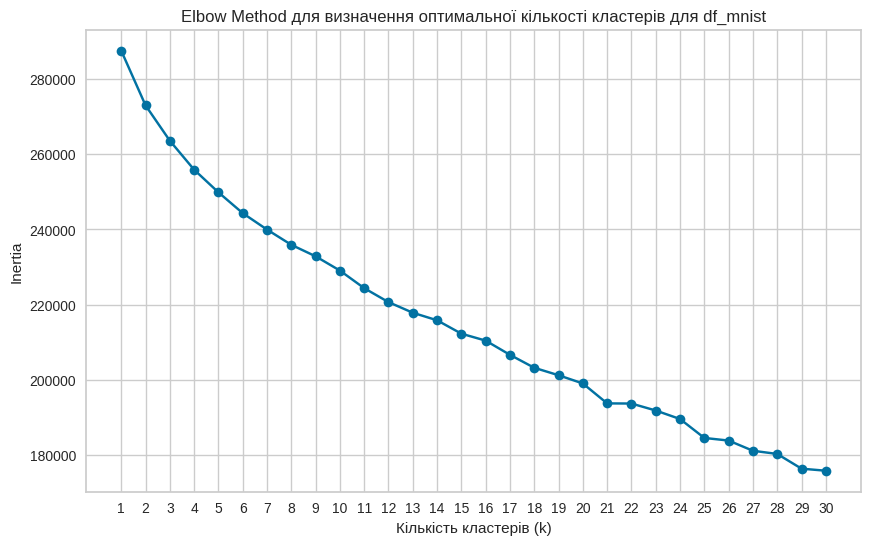

In [241]:
inertia = []
k_values = range(1, 31)

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(df_mnist_scaled)
    inertia.append(kmeans.inertia_)

# Візуалізація методу Elbow
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, 'bo-')
plt.xlabel('Кількість кластерів (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method для визначення оптимальної кількості кластерів для df_mnist')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Elbow Method для визначення оптимальної кількості кластерів

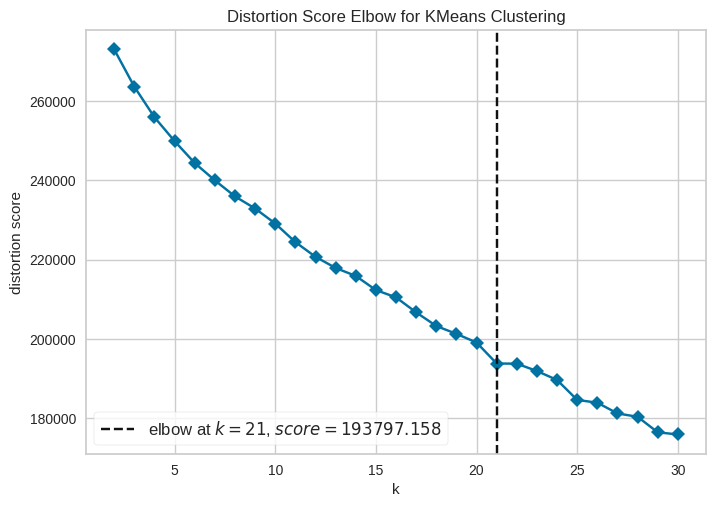

Оптимальна кількість кластерів (Elbow Method): 21


In [242]:

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2, 31), metric='distortion', timings=False)
visualizer.fit(df_mnist_scaled)
visualizer.show()
optimal_k_elbow = visualizer.elbow_value_
print(f'Оптимальна кількість кластерів (Elbow Method): {optimal_k_elbow}')

In [243]:
# Вибір оптимальної кількості кластерів (визначаємо за графіком)
optimal_k = optimal_k_elbow
print(f'Оптимальна кількість кластерів: {optimal_k}')

Оптимальна кількість кластерів: 21


In [247]:
# Зменшення розмірності за допомогою PCA
pca = PCA(n_components=2)
df_mnist_pca = pca.fit_transform(df_mnist_scaled)
df_mnist_pca.shape

(500, 2)

In [248]:
# Виконання кластеризації K-means з оптимальною кількістю кластерів
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
kmeans.fit(df_mnist_pca)

KMeans(n_clusters=21, n_init=10, random_state=42)

In [249]:
# Призначення кластерів до даних
df_mnist_clustered = pd.DataFrame(df_mnist_pca, columns=['PCA1', 'PCA2'])
df_mnist_clustered['Cluster'] = kmeans.labels_

# Візуалізація результатів кластеризації з PCA

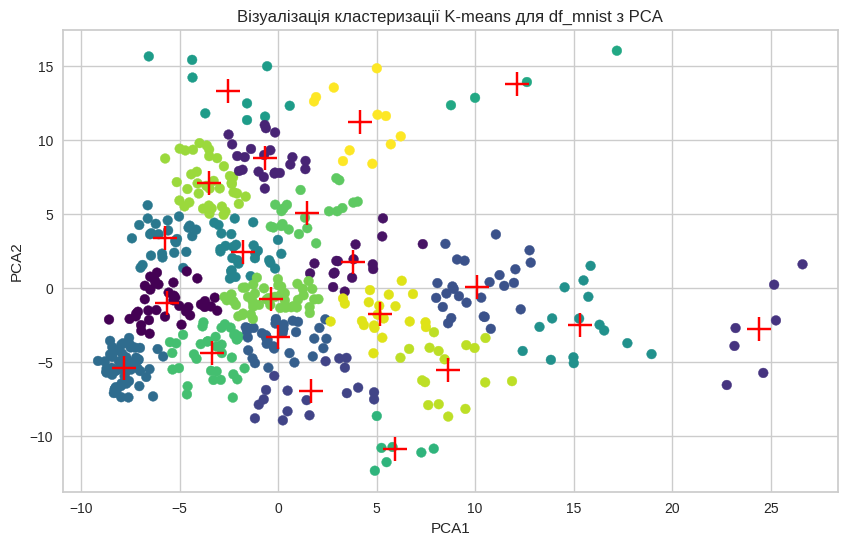

In [250]:

plt.figure(figsize=(10, 6))
plt.scatter(df_mnist_clustered['PCA1'], df_mnist_clustered['PCA2'], c=df_mnist_clustered['Cluster'], cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='+')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Візуалізація кластеризації K-means для df_mnist з PCA')
plt.grid(True)
plt.show()


